# Example Log Blocking
Constant thickness and analysis of variance log blocking algorithms are illustrated with an example gamma ray curve from the [teapot](https://wiki.seg.org/wiki/Teapot_dome_3D_survey) dataset.

First, import the required libraries and local classes/functions. Then, create two 1D numpy arrays from the provided csv.

In [1]:
# standard libs
import os

# 3rd party
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt

# local
from anova_log_blocking import anova_zoning, number_of_zones
from log_curve_visualization import curve_plot

df = pandas.read_csv('data/490252319500_GammaRay.csv')
df = df.set_index('DEPT')

depth = df.index.to_numpy()
curve = df['GR'].to_numpy()
print("number of zones in original curve: ", number_of_zones(arr=curve))

number of zones in original curve:  3846


Constant thickness blocking is the simplest and most naive log blocking algorithm as it does not use any information of the curve values. It simply blocks a constant number of samples for the entire curve. 

An example function is given below. 

> In production, the argument would likely be thickness in measured units which is then converted to number of samples or break points determined using a nearest algorithm.

In [4]:
def constant_thickness_zoning(input_array:numpy.ndarray, nsamples:int):
    output_array = numpy.zeros_like(input_array)
    
    for n in range(0,len(input_array),nsamples):
        output_array[n:n+nsamples] = numpy.median(input_array[n:n+nsamples])
    # handle the last samples
    if n+nsamples < len(input_array):
        output_array[n+nsamples:] = numpy.median(input_array[n+nsamples:])
    return output_array

curve_thick = constant_thickness_zoning(input_array=curve, nsamples=3)
print(f'number of zones with {3} samples window: {number_of_zones(arr=curve_thick)}')
print(f'mean squared error with {3} samples window: {numpy.mean(numpy.square(curve - curve_thick))}')

number of zones with 3 samples window: 1284
mean squared error with 3 samples window: 111.43296641581102


As expected, the number of zones has decreased, but are the zones representative of geologic units?

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

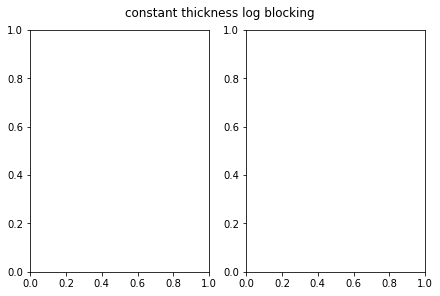

In [12]:
# create plot
gs_kw = dict(width_ratios=[1,1], height_ratios=[3,2])
fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, gridspec_kw=gs_kw)  # figsize=(16.5,9.5)
fig.suptitle('constant thickness log blocking')
curve_plot(ax=axs[0,0], depth=depth, curve=curve, ax_title='GR', cmap_name='gist_earth')
axs[0,0].set_ylabel('DEPTH')
curve_plot(ax=axs[0,1], depth=depth, curve=curve_thick, ax_title=f'nsamp={3}', cmap_name='gist_earth')

# plot depth range
z_lower_indx = numpy.argwhere(depth > 2750)
idx0 = z_lower_indx[0,0]
z_upper_indx = numpy.argwhere(depth < 2950)
idx1 = z_upper_indx[-1,0]
curve_plot(ax=axs[1,0], depth=depth[idx0:idx1], curve=curve[idx0:idx1], ax_title='GR', cmap_name='gist_earth')
axs[1,0].set_ylabel('DEPTH')
curve_plot(ax=axs[1,1], depth=depth[idx0:idx1], curve=curve_thick[idx0:idx1], ax_title=f'nsamp={3}', cmap_name='gist_earth')

### analysis of variance
